In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns

In [2]:
data = pd.read_csv("Bank_Personal_Loan_Modelling.csv")

In [3]:
data.shape

(5000, 14)

There are 5000 entries and 14 variables.

In [4]:
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


1st variable is ID which is not required.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [36]:
data.isnull().sum()

Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

All columns are of type integers or float. There are no null values
This dataset has 5000 entries.

Removing the data not needed by droping those columns. The outpot will nor be affected by ID and ZIP Code.

In [6]:
data.drop(['ID'], axis=1, inplace=True)
data.drop(['ZIP Code'], axis=1, inplace=True)

In [7]:
data.head(10)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1
5,37,13,29,4,0.4,2,155,0,0,0,1,0
6,53,27,72,2,1.5,2,0,0,0,0,1,0
7,50,24,22,1,0.3,3,0,0,0,0,0,1
8,35,10,81,3,0.6,2,104,0,0,0,1,0
9,34,9,180,1,8.9,3,0,1,0,0,0,0


Some of the daat is binary such as Online, CreditCard, Security Account, Personal Loan. Also some data is classified using numbers such as Education. 

In [8]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0


In [9]:
data['Experience'][data.Experience<0].count()

52

###### There are 52 enetries where in years of professional experience is in negative.
years of professional experience cannot be negative so we have to change it to abslute values

In [10]:
data.loc[data.Experience < 0, 'Experience']=data.loc[data.Experience < 0, 'Experience'].abs()

In [11]:
data.var()

Age                     131.404166
Experience              130.306544
Income                 2119.104235
Family                    1.317130
CCAvg                     3.054312
Education                 0.705380
Mortgage              10345.697538
Personal Loan             0.086801
Securities Account        0.093519
CD Account                0.056763
Online                    0.240678
CreditCard                0.207606
dtype: float64

We can see that Personal Loans have very small variability and Morgage varies a lot.

C:\Users\kasturi.kolambkar\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Income', ylabel='Density'>

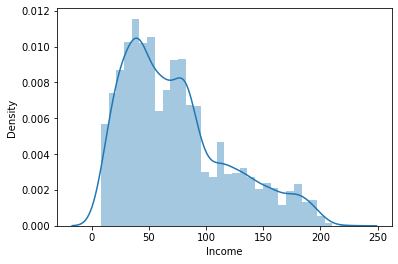

In [12]:
sns.distplot(data.Income)

C:\Users\kasturi.kolambkar\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Income'>

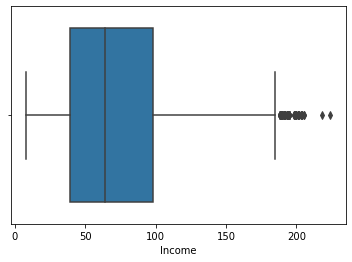

In [13]:
sns.boxplot(data.Income)

There are quite a few outliers in Income. The data is right skewed and all outliers lie on the right.

C:\Users\kasturi.kolambkar\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Experience', ylabel='Density'>

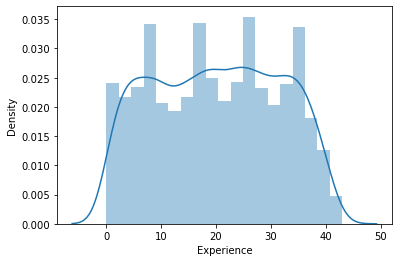

In [14]:
sns.distplot(data.Experience)

C:\Users\kasturi.kolambkar\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Experience'>

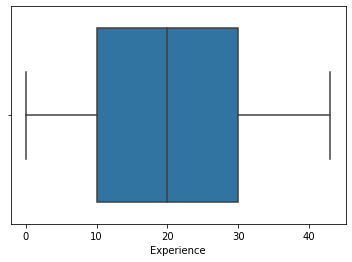

In [15]:
sns.boxplot(data.Experience)

Data is evenly distributed. No outliers.

C:\Users\kasturi.kolambkar\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CCAvg', ylabel='Density'>

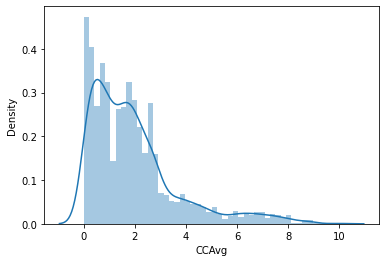

In [16]:
sns.distplot(data.CCAvg)

C:\Users\kasturi.kolambkar\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CCAvg'>

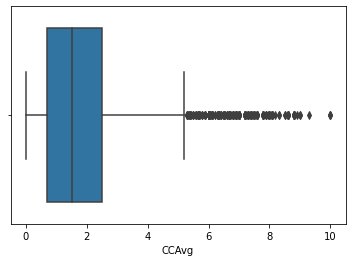

In [17]:
sns.boxplot(data.CCAvg)

In [18]:
data.CCAvg.mode()

0    0.3
dtype: float64

Most people have less than 500$ Avg. spending on credit cards per month. But there are a lot of outliers on the higher side too.

C:\Users\kasturi.kolambkar\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mortgage', ylabel='Density'>

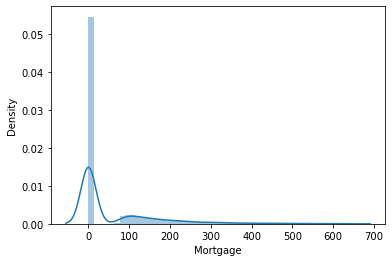

In [19]:
sns.distplot(data.Mortgage)

##### There are a lot of people that do not pay any Mortgage

C:\Users\kasturi.kolambkar\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mortgage', ylabel='Density'>

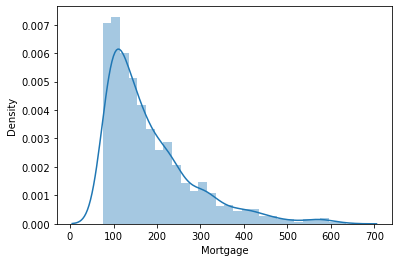

In [20]:
has_morg = data['Mortgage'][data['Mortgage']!=0]
sns.distplot(has_morg)

C:\Users\kasturi.kolambkar\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Mortgage'>

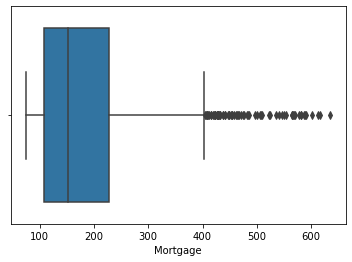

In [38]:
sns.boxplot(has_morg)

We are going to leave the outliers as they are because they can provide some insight.

C:\Users\kasturi.kolambkar\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Securities Account', ylabel='count'>

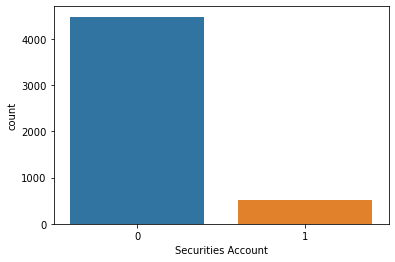

In [21]:
sns.countplot(data['Securities Account'])

##### Very few people have Securities Account

C:\Users\kasturi.kolambkar\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CD Account', ylabel='count'>

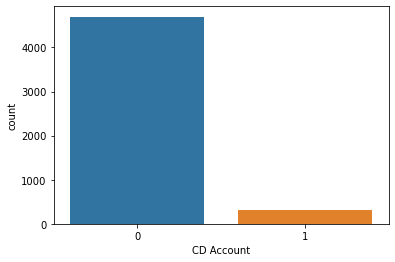

In [22]:
sns.countplot(data['CD Account'])

##### Very few people have CD Accoune

C:\Users\kasturi.kolambkar\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Personal Loan', ylabel='count'>

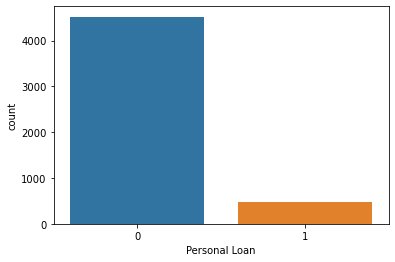

In [23]:
sns.countplot(data['Personal Loan'])

##### Few people have taken Personal Loan last time. This also indicates class inbalance. i.e. There are dewer entries on which our model can train for successful outcome(individual takes a Personal Loan) compared to the unsuccesful one(individual does not take a Personal Loan)

C:\Users\kasturi.kolambkar\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Online', ylabel='count'>

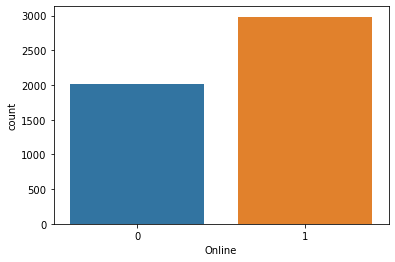

In [24]:
sns.countplot(data['Online'])

##### Most people prefer to use internet banking facilities.

C:\Users\kasturi.kolambkar\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CreditCard', ylabel='count'>

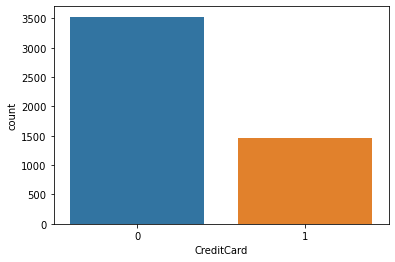

In [25]:
sns.countplot(data['CreditCard'])

##### Resonable amount of people use Creditcard facilities however most dont.

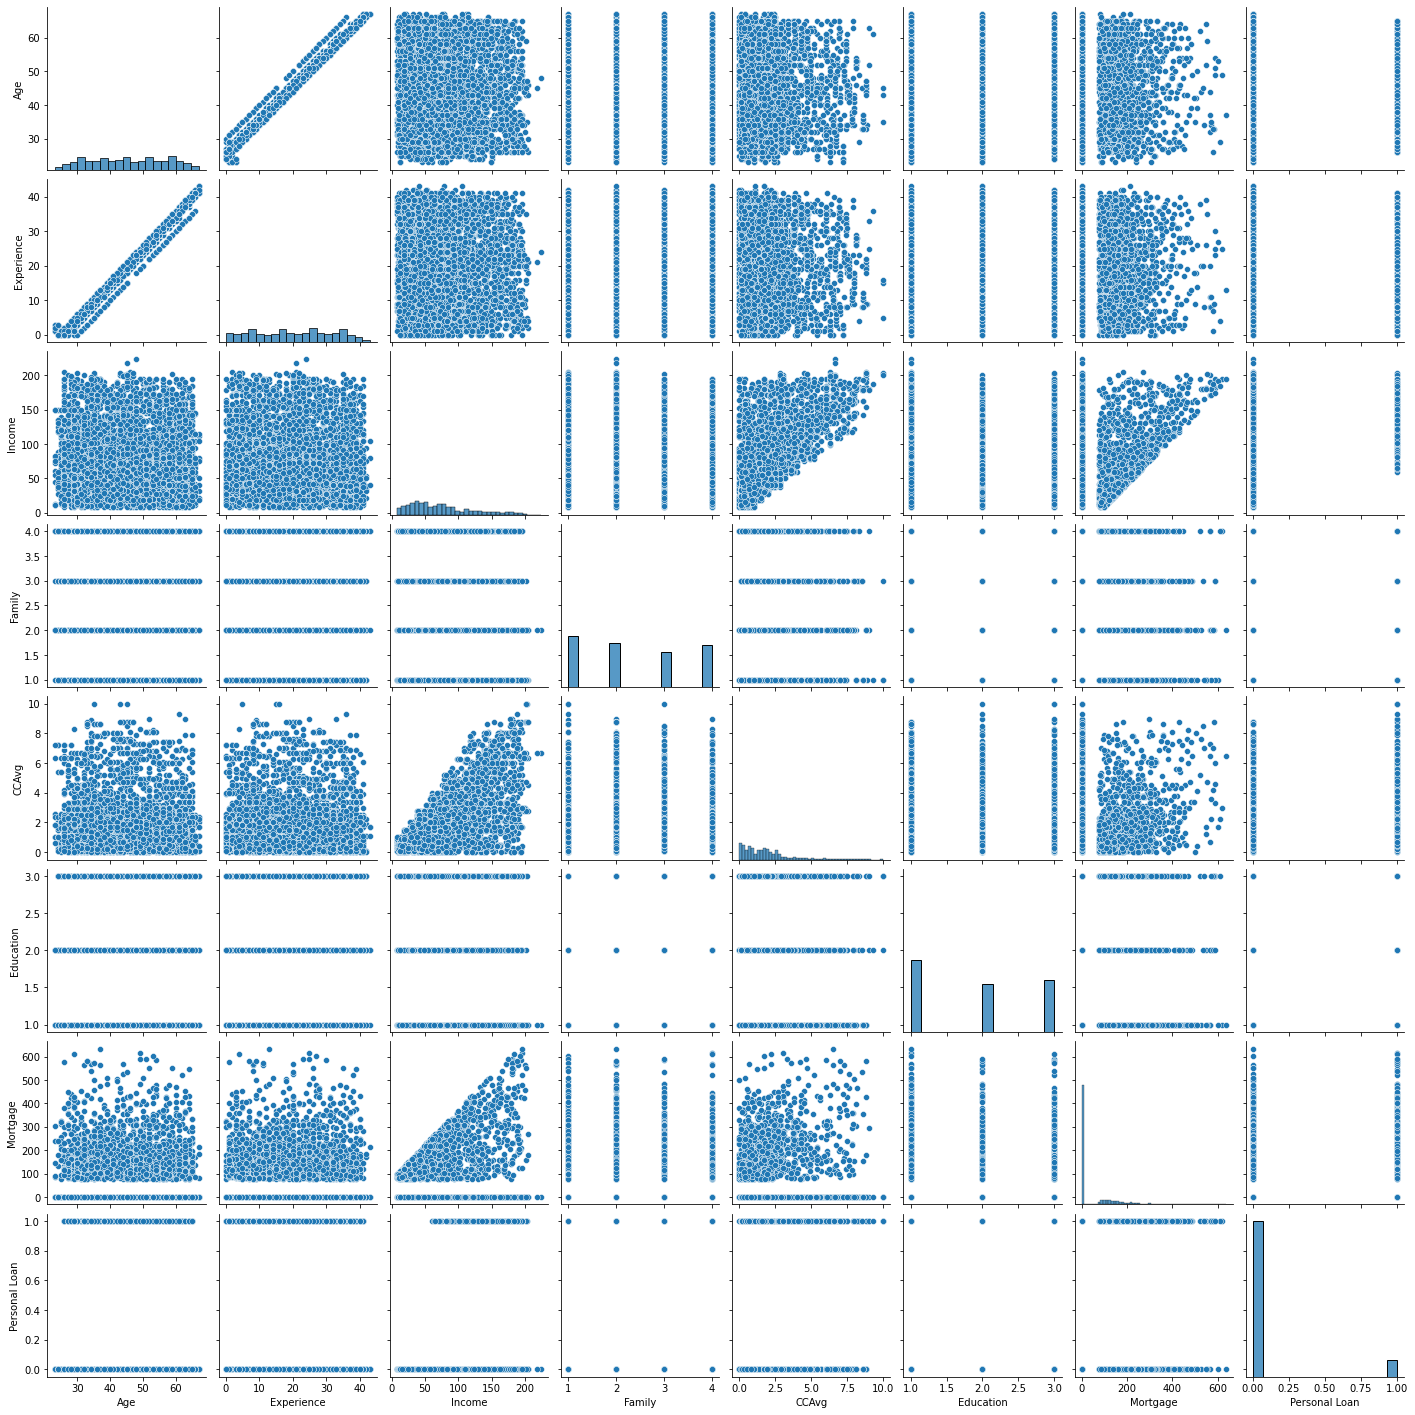

In [26]:
continious_data = data[["Age","Experience","Income","Family","CCAvg","Education","Mortgage","Personal Loan"]]
sns.pairplot(continious_data)

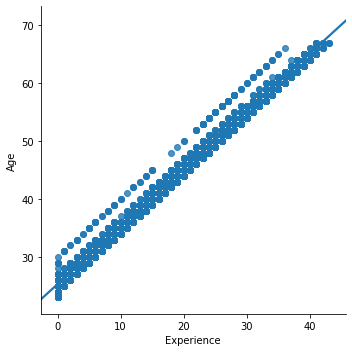

In [37]:
sns.lmplot(data = data, x = 'Experience', y = 'Age')

Notice that 'Income'and other attributes have relationship that is not really linear but linear regretion will provide some usefull information.
Also, Age and Experience have a very strong linear relationship. We can drop one of these as the provide the same variance to the model.

In [29]:
data.drop(['Age'], axis=1, inplace=True)

In [33]:
data["Personal Loan"][data["Personal Loan"]==1].count()

480

In [34]:
data["Personal Loan"][data["Personal Loan"]==0].count()

4520

Most people do not opt for personal loan. 

C:\Users\kasturi.kolambkar\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Experience', ylabel='Density'>

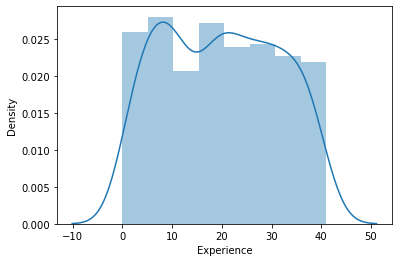

In [31]:
sns.distplot(data['Experience'][data['Personal Loan']==1])

C:\Users\kasturi.kolambkar\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Experience', ylabel='Density'>

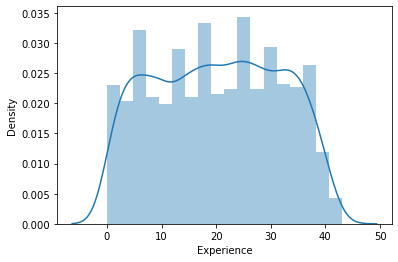

In [32]:

sns.distplot(data['Experience'][data['Personal Loan']==0])

##### People in their late 20s and early 60s tend to take for Personal loans

C:\Users\kasturi.kolambkar\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Income', ylabel='Density'>

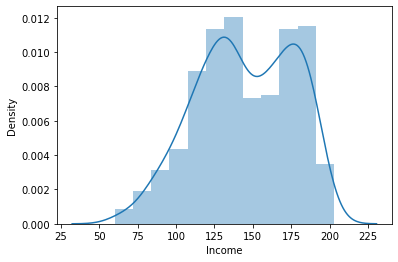

In [39]:
sns.distplot(data['Income'][data['Personal Loan']==1])

##### People with income of above 100 are more likely to take a personal loan

In [40]:
data.corr()

,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Experience,1.000000,-0.046876,-0.051851,-0.049738,0.013919,-0.011097,-0.008304,-0.000989,0.009735,0.014051,0.008851
Income,-0.046876,1.000000,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
Family,-0.051851,-0.157501,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.049738,0.645984,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.013919,-0.187524,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.011097,0.206806,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.008304,0.502462,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000989,-0.002616,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028
CD Account,0.009735,0.169738,0.014110,0.136534,0.013934,0.089311,0.316355,0.317034,1.000000,0.175880,0.278644
Online,0.014051,0.014206,0.010354,-0.003611,-0.015004,-0.005995,0.006278,0.012627,0.175880,1.000000,0.004210


<AxesSubplot:>

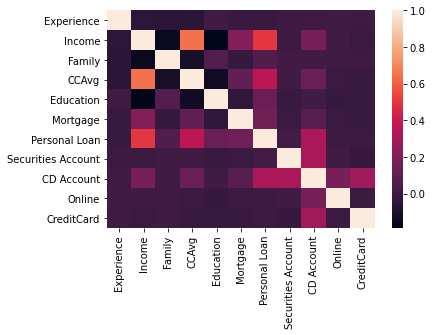

In [41]:
sns.heatmap(data.corr())

##### Age and experience have varry strong correlation and Income has a correlation of around 0.6 with CCAvg and around 0.5 with Personal Loan

In [42]:
data[["Income", "CCAvg"]].corr()

,Income,CCAvg
Income,1.000000,0.645984
CCAvg,0.645984,1.000000


In [43]:
data[["Income", "Personal Loan"]].corr()

,Income,Personal Loan
Income,1.000000,0.502462
Personal Loan,0.502462,1.000000


In [45]:
#data[["Experience", "Age"]].corr()

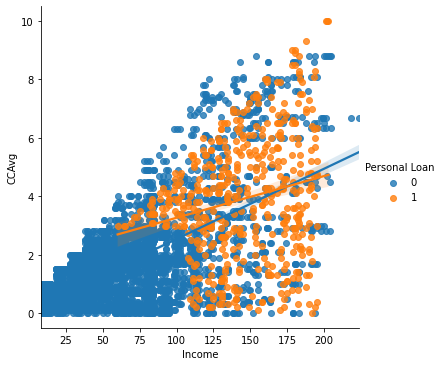

In [46]:
sns.lmplot(data = data, x = 'Income', y = 'CCAvg', hue="Personal Loan")

C:\Users\kasturi.kolambkar\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Family', ylabel='Density'>

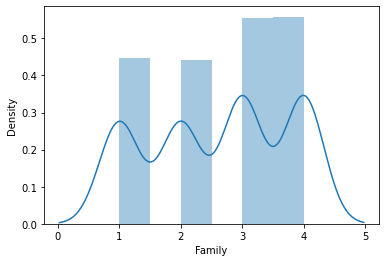

In [47]:
sns.distplot(data['Family'][data['Personal Loan']==1])

#### People with family of 3 or 4 tend to opt for personal loan more

C:\Users\kasturi.kolambkar\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Family', ylabel='Density'>

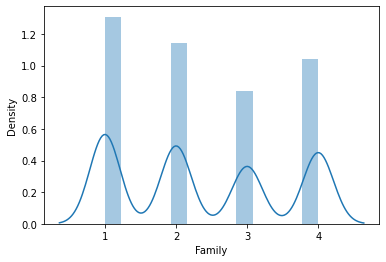

In [48]:
sns.distplot(data['Family'][data['Personal Loan']==0])

#### Single person in a family is slightly less likely to opt for Personal Loan

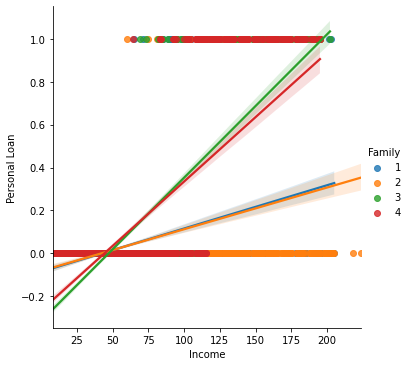

In [49]:
sns.lmplot(data = data, x='Income', y='Personal Loan', hue='Family')

#### Family of 3 or 4 with income more than 100k tend towards takind a Personal Loan

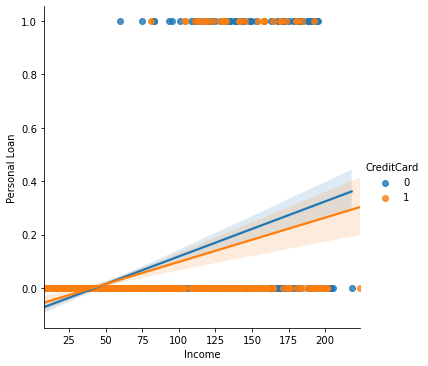

In [50]:
sns.lmplot(data = data[data.Family==2], x='Income', y='Personal Loan', hue='CreditCard')

In [51]:
from sklearn.model_selection import train_test_split

X = data.drop(['Personal Loan'], axis=1)
Y = data['Personal Loan']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

In [52]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver="liblinear")
model.fit(X_train, Y_train)

LogisticRegression(solver='liblinear')

In [53]:
model_score = model.score(X_train, Y_train)
print(model_score)

0.9511428571428572


In [54]:
model_score = model.score(X_test, Y_test)
print(model_score)

0.9433333333333334


### It has 94% accuracy in its pridictions.

In [55]:
Y_predict = model.predict(X_test)

<AxesSubplot:>

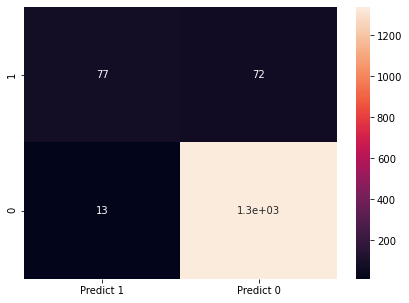

In [56]:
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline 

cm=metrics.confusion_matrix(Y_test, Y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [57]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, Y_predict)

array([[1338,   13],
       [  72,   77]], dtype=int64)

In [58]:
print(metrics.classification_report(Y_test, Y_predict, labels=[1, 0]))

              precision    recall  f1-score   support

           1       0.86      0.52      0.64       149
           0       0.95      0.99      0.97      1351

    accuracy                           0.94      1500
   macro avg       0.90      0.75      0.81      1500
weighted avg       0.94      0.94      0.94      1500



#### Here the recall for people taking Personal Loa is 56% with precision of 84% and accuracy of 95%

In [59]:
from sklearn.naive_bayes import GaussianNB
NBmodel = GaussianNB()
NBmodel.fit(X_train, Y_train.ravel())

GaussianNB()

In [60]:
NBmodel_score = NBmodel.score(X_train, Y_train)
print(NBmodel_score)

0.8897142857142857


In [61]:
NBmodel_score = NBmodel.score(X_test, Y_test)
print(NBmodel_score)

0.8753333333333333


### It has 87% accuracy in its pridictions.

Confusion Matrix


<AxesSubplot:>

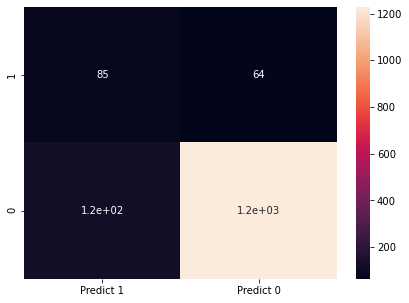

In [62]:
NBpredict = NBmodel.predict(X_test)
print("Confusion Matrix")
cm=metrics.confusion_matrix(Y_test, NBpredict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [63]:
confusion_matrix(Y_test, NBpredict)

array([[1228,  123],
       [  64,   85]], dtype=int64)

In [64]:
print(metrics.classification_report(Y_test, NBpredict, labels=[1, 0]))

              precision    recall  f1-score   support

           1       0.41      0.57      0.48       149
           0       0.95      0.91      0.93      1351

    accuracy                           0.88      1500
   macro avg       0.68      0.74      0.70      1500
weighted avg       0.90      0.88      0.88      1500



#### The recall here is 56% however precision is low (41%)

In [65]:
from sklearn.neighbors import KNeighborsClassifier

In [66]:
NNH = KNeighborsClassifier(n_neighbors= 41 , weights = 'distance' )
NNH.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=41, weights='distance')

In [67]:
KNNmodel_score = NNH.score(X_train, Y_train)
print(KNNmodel_score)

1.0


In [68]:
KNNmodel_score = NNH.score(X_test, Y_test)
print(KNNmodel_score)

0.9106666666666666


### It has 91% accuracy in its pridictions

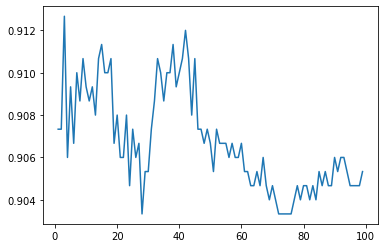

In [69]:
scores = []
for k in range(1,100):
    NNH2 = KNeighborsClassifier(n_neighbors= k , weights = 'distance' )
    NNH2.fit(X_train, Y_train)
    scores.append(NNH2.score(X_test,Y_test))
plt.plot(range(1,100),scores)

###### The highest accuract is when k value is 41

Confusion Matrix


<AxesSubplot:>

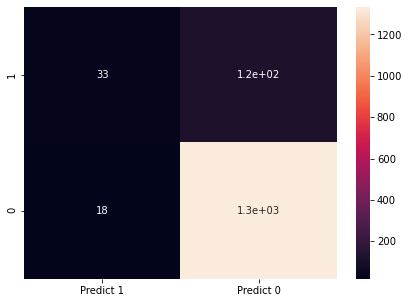

In [70]:
KNNpredict = NNH.predict(X_test)
print("Confusion Matrix")
cm=metrics.confusion_matrix(Y_test, KNNpredict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [71]:
print(metrics.classification_report(Y_test, KNNpredict, labels=[1, 0]))

              precision    recall  f1-score   support

           1       0.65      0.22      0.33       149
           0       0.92      0.99      0.95      1351

    accuracy                           0.91      1500
   macro avg       0.78      0.60      0.64      1500
weighted avg       0.89      0.91      0.89      1500



#### This only has 23% recall foe positive cases so we donot use this model

#### Comparinf each models Precision and Recall and Accuracy, Logistic Regression provides the best model for prediction.